# Business Case: 

This heart disease prediction aim to detect the presence or risk of heart disease in the person based on their medical attributes. For this, we use a representative data set that includes medical histories and attribute information for several patients. Moreover, data processing, exploratory data analysis, and some data visualization bring out new insights from a medical dataset. For example, using some data processing on our heart disease data, we saw how thalassemia was the most significant deciding factor in heart disease diagnosis. Medical experts can use data science to back their diagnosis, and even improve and hasten the treatment.

# Domain Analysis:

The given dataset contains data about Heart disease Prediction in total three data types i.e.,float,int,object.Mainly observe that the data is belongs to supervised domain.The attribute information regarding this dataset is:
- There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
- slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
- thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
- resting_blood_pressure (type: int): resting blood prechest_pain_type (type: int): chest pain type (4 values)
- num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
- fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
- resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
- serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
- oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
- sex (type: binary): 0: female, 1: male
- age (type: int): age in years
- max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
- exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)
​
In order to proceed further we need to import the required libraries and packages regarding prediction of heart disease prediction

## Importing and Reading the data:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import klib
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('labels.csv')
df1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [3]:
df2=pd.read_csv('values.csv')
df2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
df=pd.merge(df1,df2)
df

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


## Basic Checks:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

In [6]:
df.isnull().sum()

patient_id                              0
heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

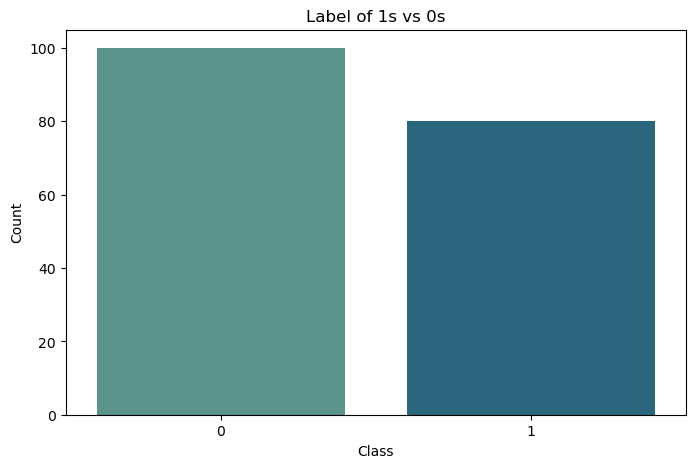

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='heart_disease_present',data=df,palette='crest')
plt.title('Label of 1s vs 0s')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='Density'>

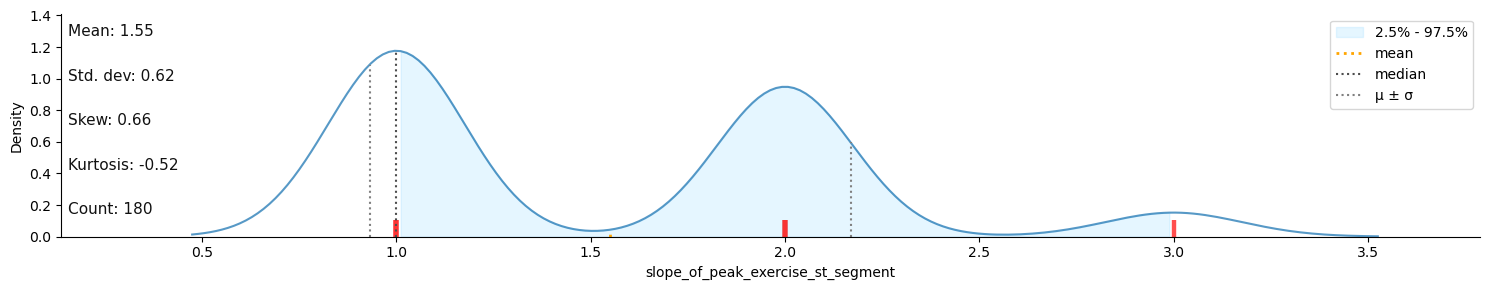

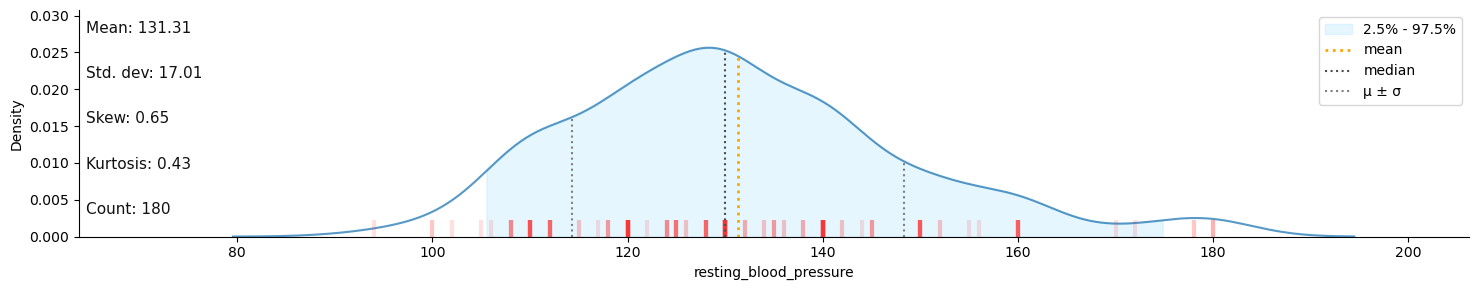

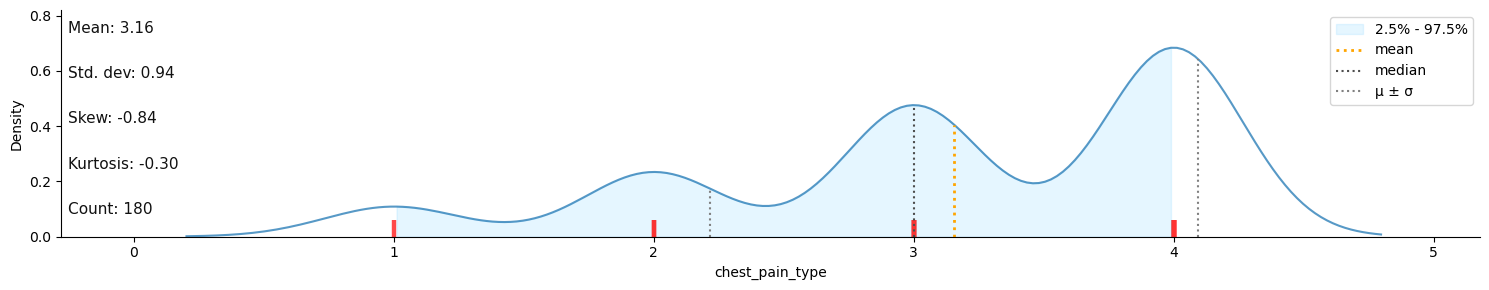

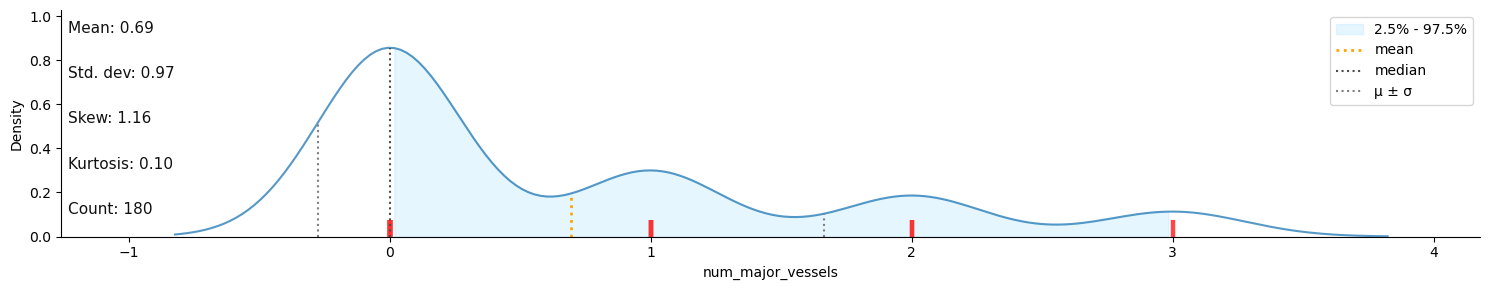

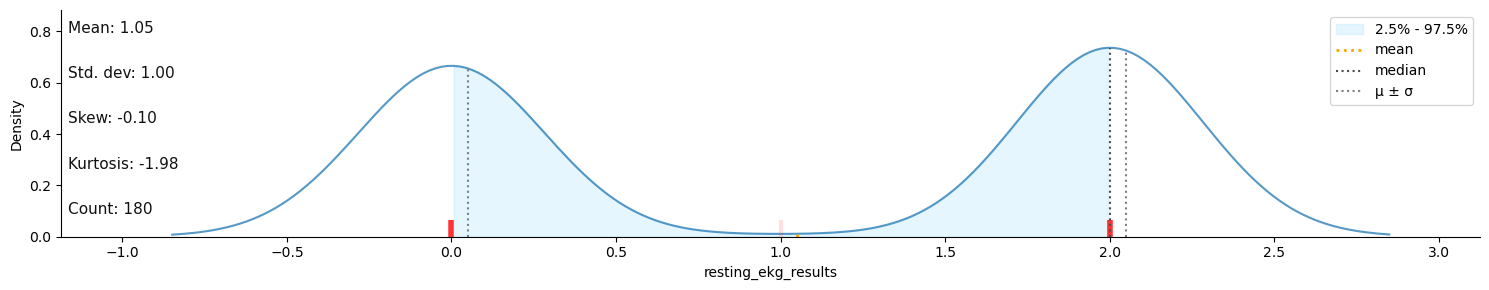

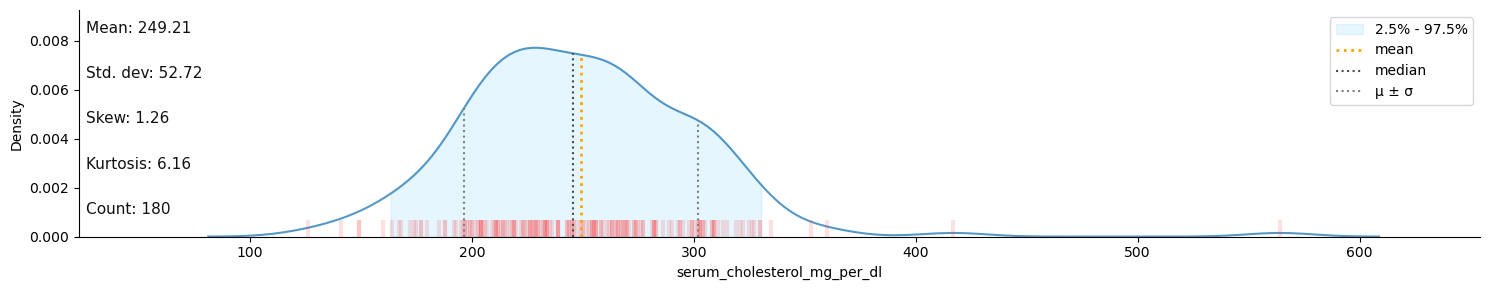

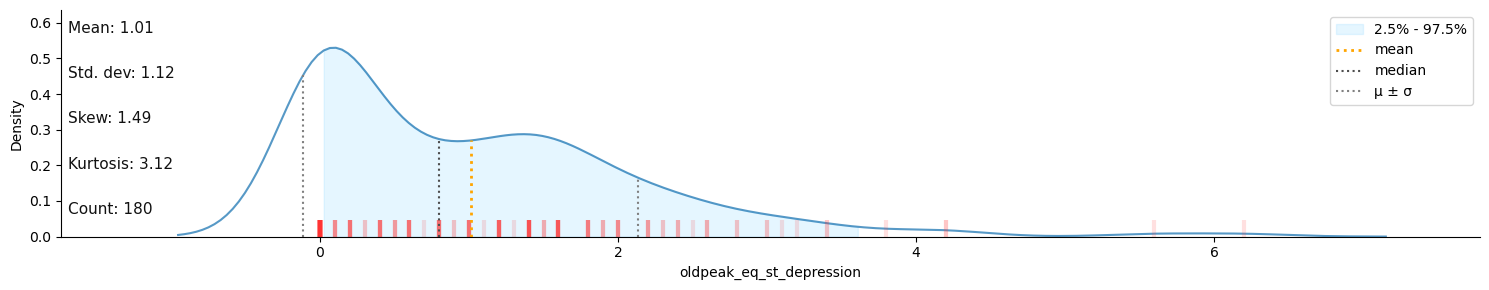

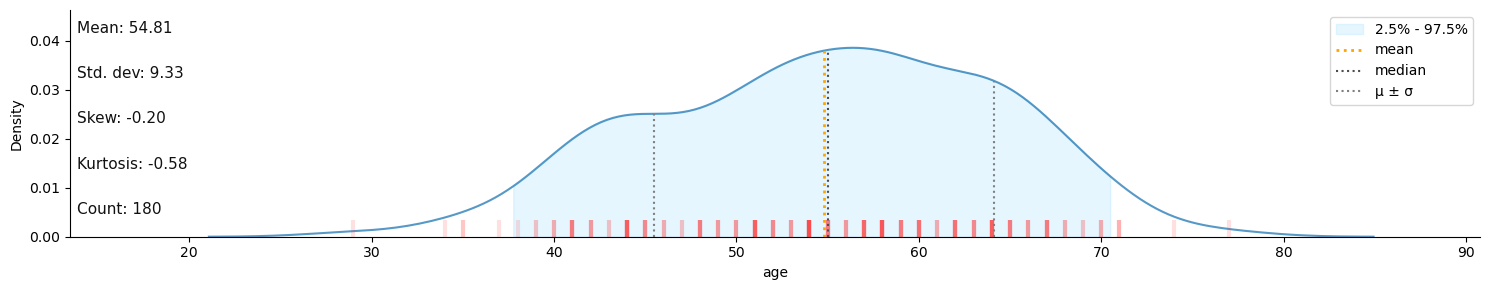

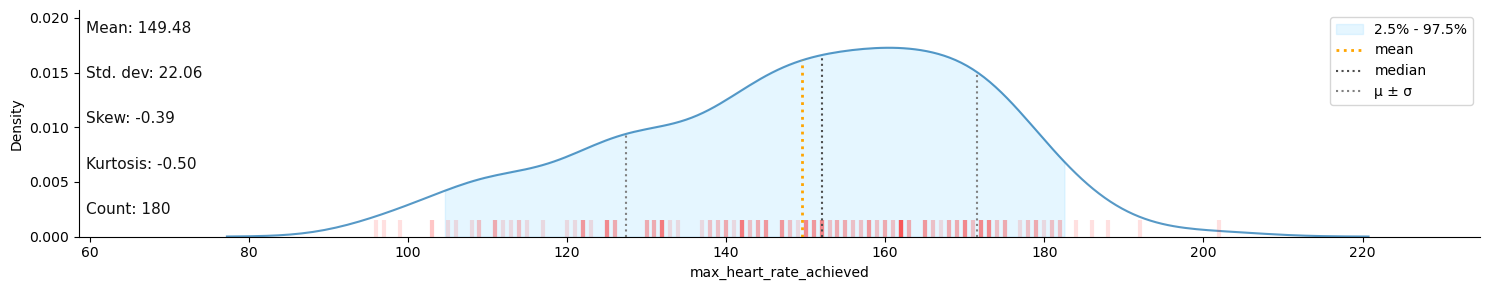

In [10]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

In [11]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Long column names detected (>25 characters). Consider renaming the following columns ['slope_of_peak_exercise_st_segment', 'fasting_blood_sugar_gt_120_mg_per_dl', 'serum_cholesterol_mg_per_dl'].
Shape of cleaned data: (180, 15) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.02 MB (-66.67%)



,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

In [13]:
## Renaming the columns
df.rename(columns={'slope_of_peak_exercise_st_segment':'slope','fasting_blood_sugar_gt_120_mg_per_dl':'fbs', 
                  'resting_blood_pressure':'restbps','chest_pain_type':'cp','resting_ekg_results':'restecg',
                  'serum_cholesterol_mg_per_dl':'chol','oldpeak_eq_st_depression':'oldpeak',
                  'exercise_induced_angina':'exang','max_heart_rate_achieved':'maxhrach'},inplace=True)

In [14]:
df.drop(columns={'patient_id','num_major_vessels'},inplace=True)

In [15]:
## Ordinal Encoding

dict={'normal':0,'reversible_defect':1,'fixed_defect':2}
df.thal=df.thal.map(dict)
df['thal'].value_counts()

0    98
1    74
2     8
Name: thal, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   heart_disease_present  180 non-null    int64  
 1   slope                  180 non-null    int64  
 2   thal                   180 non-null    int64  
 3   restbps                180 non-null    int64  
 4   cp                     180 non-null    int64  
 5   fbs                    180 non-null    int64  
 6   restecg                180 non-null    int64  
 7   chol                   180 non-null    int64  
 8   oldpeak                180 non-null    float64
 9   sex                    180 non-null    int64  
 10  age                    180 non-null    int64  
 11  maxhrach               180 non-null    int64  
 12  exang                  180 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 23.8 KB


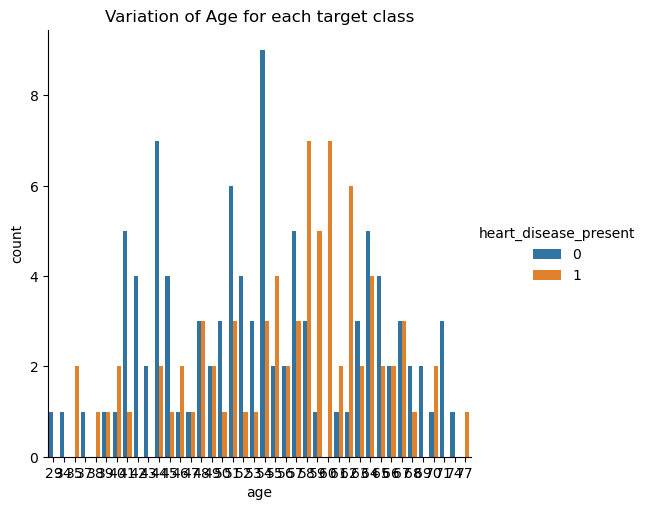

In [17]:
# distribution of target vs age 
sns.set_context() 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'heart_disease_present', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

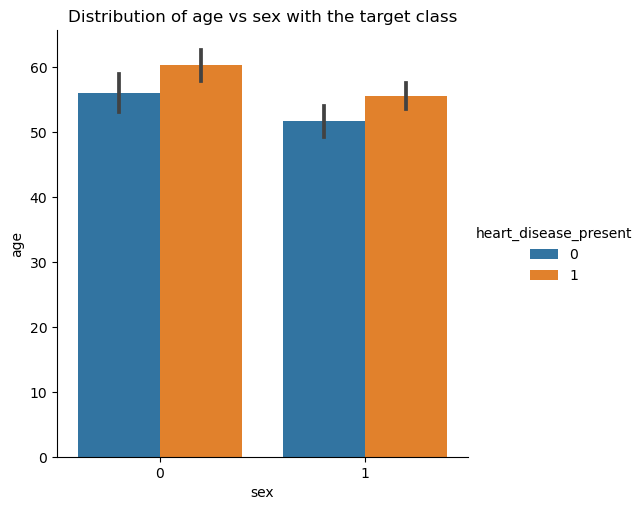

In [18]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'heart_disease_present')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [19]:
df.isnull().sum()

heart_disease_present    0
slope                    0
thal                     0
restbps                  0
cp                       0
fbs                      0
restecg                  0
chol                     0
oldpeak                  0
sex                      0
age                      0
maxhrach                 0
exang                    0
dtype: int64

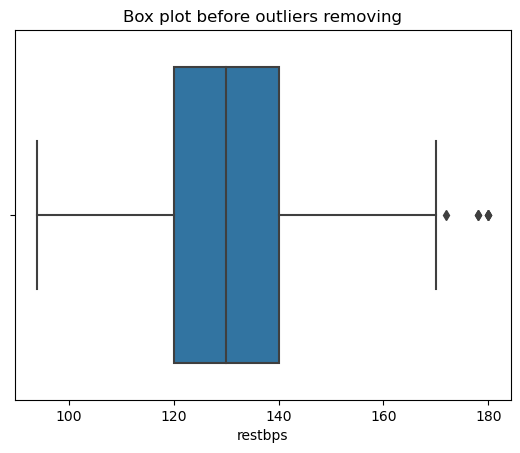

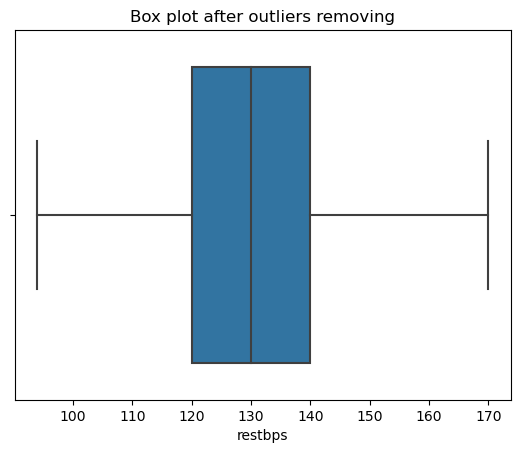

In [20]:
sns.boxplot(df['restbps'])
plt.title('Box plot before outliers removing')
plt.show()

def drop_outliers(df,restbps):
    iqr=1.5*(np.percentile(df['restbps'],75)-np.percentile(df['restbps'],25))
    df.drop(df[df['restbps']>(iqr+np.percentile(df['restbps'],75))].index,inplace=True)
    df.drop(df[df['restbps']<(np.percentile(df['restbps'],25)-iqr)].index,inplace=True)
    
drop_outliers(df,'restbps')
sns.boxplot(df['restbps'])
plt.title('Box plot after outliers removing')
plt.show()

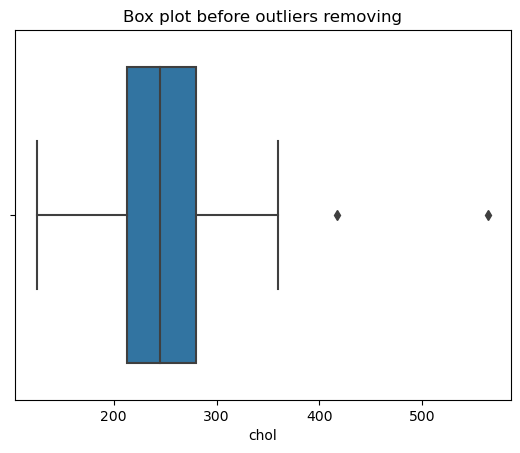

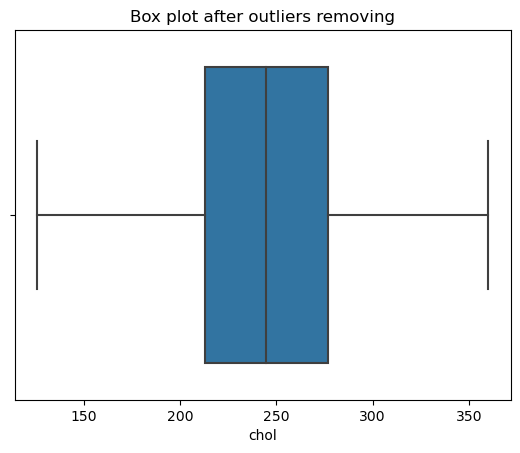

In [21]:
sns.boxplot(df['chol'])
plt.title('Box plot before outliers removing')
plt.show()

def drop_outliers(df,chol):
    iqr=1.5*(np.percentile(df['chol'],75)-np.percentile(df['chol'],25))
    df.drop(df[df['chol']>(iqr+np.percentile(df['chol'],75))].index,inplace=True)
    df.drop(df[df['chol']<(np.percentile(df['chol'],25)-iqr)].index,inplace=True)
    
drop_outliers(df,'chol')
sns.boxplot(df['chol'])
plt.title('Box plot after outliers removing')
plt.show()

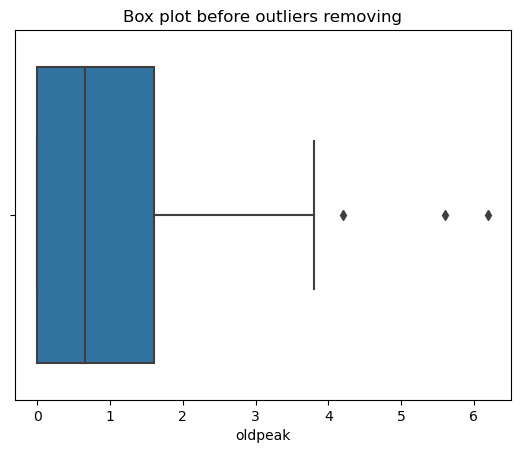

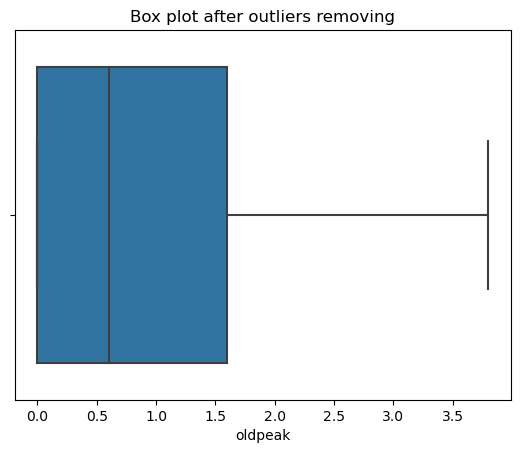

In [22]:
sns.boxplot(df['oldpeak'])
plt.title('Box plot before outliers removing')
plt.show()

def drop_outliers(df,oldpeak):
    iqr=1.5*(np.percentile(df['oldpeak'],75)-np.percentile(df['oldpeak'],25))
    df.drop(df[df['oldpeak']>(iqr+np.percentile(df['oldpeak'],75))].index,inplace=True)
    df.drop(df[df['oldpeak']<(np.percentile(df['oldpeak'],25)-iqr)].index,inplace=True)
    
drop_outliers(df,'oldpeak')
sns.boxplot(df['oldpeak'])
plt.title('Box plot after outliers removing')
plt.show()

<AxesSubplot:>

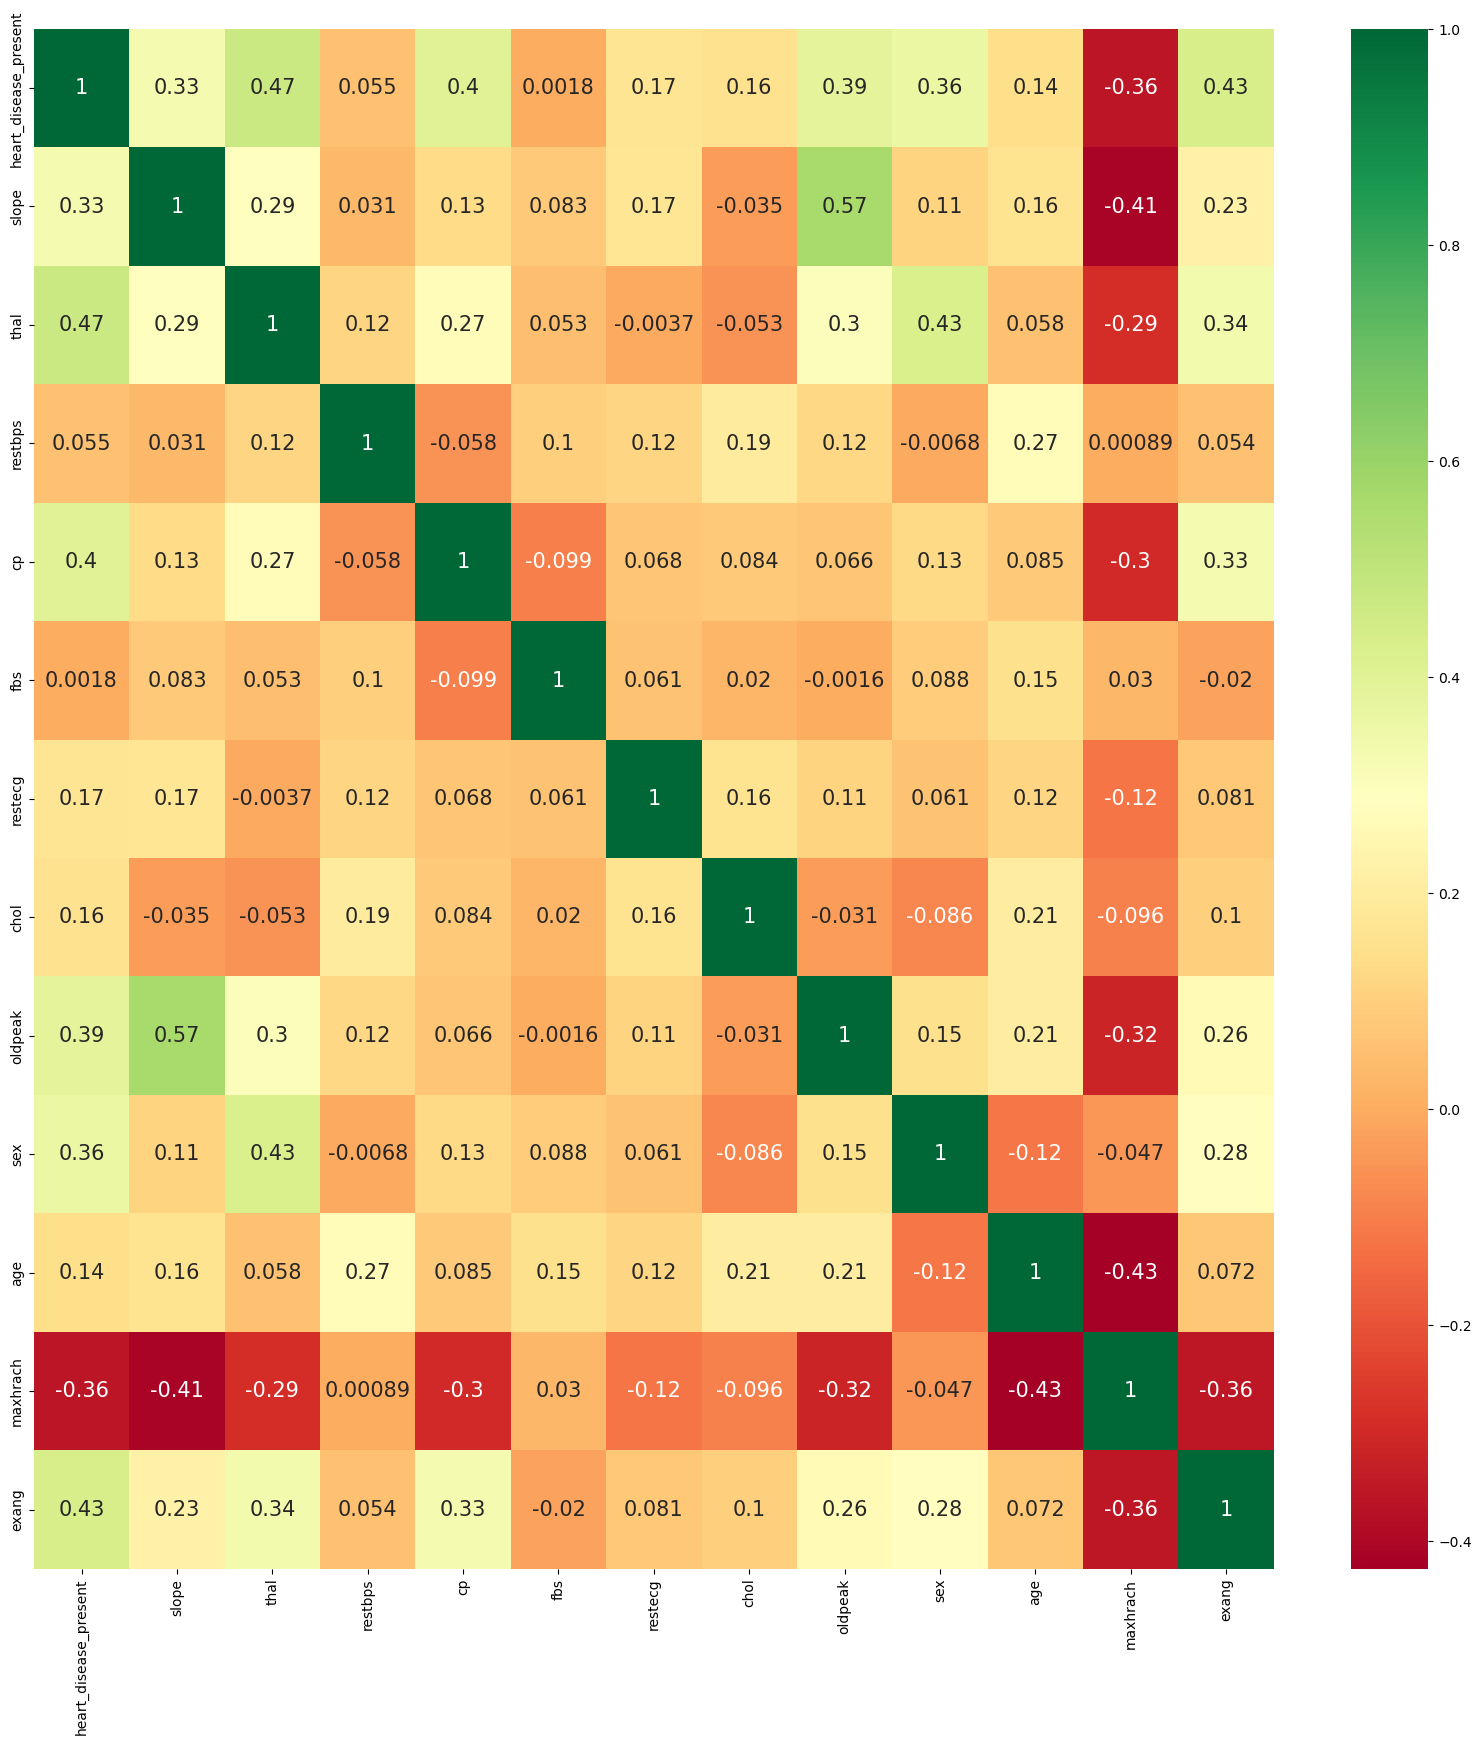

In [23]:
## Checking correlation

plt.figure(figsize=(20, 20))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [24]:
## Exp-1
df3=df.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   heart_disease_present  169 non-null    int64  
 1   slope                  169 non-null    int64  
 2   thal                   169 non-null    int64  
 3   restbps                169 non-null    int64  
 4   cp                     169 non-null    int64  
 5   fbs                    169 non-null    int64  
 6   restecg                169 non-null    int64  
 7   chol                   169 non-null    int64  
 8   oldpeak                169 non-null    float64
 9   sex                    169 non-null    int64  
 10  age                    169 non-null    int64  
 11  maxhrach               169 non-null    int64  
 12  exang                  169 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 18.5 KB


In [25]:
df3=pd.get_dummies(df3,columns=['slope','thal','cp','fbs','restecg','sex','exang'])
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
columns_to_scale=['age','restbps','chol','oldpeak','maxhrach']
df3[columns_to_scale]=sc.fit_transform(df3[columns_to_scale])

### And below, we see a limited subset of the attributes we encoded and scaled. For instance, the chest pain data variable expanded into cp_0, cp_1, cp_2, and cp_3. This normalized and engineered dataset will be appropriate for training.

In [26]:
df3.head()

,heart_disease_present,restbps,chol,oldpeak,age,maxhrach,slope_1,slope_2,slope_3,thal_0,...,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_2,sex_0,sex_1,exang_0,exang_1
0,0,-0.096702,1.378097,-0.968550,-1.008162,0.909648,1,0,0,1,...,0,0,1,0,0,1,0,1,1,0
1,0,-1.317319,-0.711475,0.746551,-0.047978,0.368819,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,1,-0.300139,1.289179,-0.968550,2.405826,0.549096,1,0,0,1,...,0,1,1,0,0,1,0,1,0,1
3,1,1.530787,-0.511410,-0.968550,-1.541597,1.405407,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
5,0,0.038922,-1.467278,-0.968550,-1.328223,0.008267,1,0,0,1,...,1,0,1,0,1,0,0,1,1,0


### Data Preprocessing

In [27]:
X=df3.drop(columns='heart_disease_present', axis=1)
y=df3['heart_disease_present']

In [28]:
X

,restbps,chol,oldpeak,age,maxhrach,slope_1,slope_2,slope_3,thal_0,thal_1,...,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_2,sex_0,sex_1,exang_0,exang_1
0,-0.096702,1.378097,-0.968550,-1.008162,0.909648,1,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0
1,-1.317319,-0.711475,0.746551,-0.047978,0.368819,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,-0.300139,1.289179,-0.968550,2.405826,0.549096,1,0,0,1,0,...,0,1,1,0,0,1,0,1,0,1
3,1.530787,-0.511410,-0.968550,-1.541597,1.405407,1,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0
5,0.038922,-1.467278,-0.968550,-1.328223,0.008267,1,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.717042,-0.155738,0.317776,-0.047978,0.458957,1,0,0,1,0,...,0,1,1,0,1,0,0,1,1,0
175,-0.300139,0.177704,-0.754162,1.338955,0.594165,0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
177,-0.300139,1.400327,0.960939,1.018894,-0.848045,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
178,-0.367951,0.199934,-0.968550,-0.688100,1.134993,1,0,0,1,0,...,1,0,0,1,1,0,0,1,1,0


In [29]:
y

0      0
1      0
2      1
3      1
5      0
      ..
174    0
175    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 169, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y)

In [31]:
X_train.shape

(126, 23)

In [32]:
X_test.shape

(43, 23)

### KNeighborsClassifier

In [33]:
knn_scores=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_scores.append(knn.score(X_test,y_test))

print(f'Best choice of k:{np.argmax(knn_scores)+1}')

Best choice of k:9


In [34]:
k=11
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)
accuracy_score(y_pred1,y_test)

0.7441860465116279

In [35]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.70      0.80      0.74        20

    accuracy                           0.74        43
   macro avg       0.75      0.75      0.74        43
weighted avg       0.75      0.74      0.74        43



In [36]:
y_hat1=knn.predict(X_test)
f1_score(y_test,y_hat1)

0.7441860465116279

In [37]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,X,y,cv=3, scoring = 'f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.7755102  0.72340426 0.8       ]
Cross validation Score: 0.7663048198002606
Std : 0.03194037518699839


## Naive_bayes

In [38]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(X_train, y_train)

GaussianNB()

In [39]:
from sklearn.metrics import accuracy_score
y_pred2=nb.predict(X_test)
accuracy_score(y_pred2,y_test)

0.6744186046511628

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.61      0.74      0.67        19

    accuracy                           0.67        43
   macro avg       0.68      0.68      0.67        43
weighted avg       0.69      0.67      0.68        43



In [41]:
y_hat2=nb.predict(X_test)
f1_score(y_test,y_hat2)

0.6666666666666666

In [42]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb,X,y,cv=3, scoring = 'f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.72340426 0.83333333 0.67857143]
Cross validation Score: 0.7451030057413036
Std : 0.06501763155122076


## SVM

In [43]:
from sklearn.svm import SVC
svc_scores=[]
kernels=['linear','poly','rbf','sigmoid']

for i in range(len(kernels)):
    svc=SVC(kernel=kernels[i])
    svc.fit(X_train,y_train)
    svc_scores.append(svc.score(X_test,y_test))
    
print(f'Best choice:{np.argmax(svc_scores)+1}')

Best choice:1


In [44]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred3=svc.predict(X_test)
accuracy_score(y_pred3,y_test)

0.7441860465116279

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.65      0.83      0.73        18

    accuracy                           0.74        43
   macro avg       0.75      0.76      0.74        43
weighted avg       0.77      0.74      0.75        43



In [46]:
y_hat3=svc.predict(X_test)
f1_score(y_test,y_hat3)

0.7317073170731708

In [47]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc,X,y,cv=3, scoring = 'f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.7755102  0.7826087  0.70175439]
Cross validation Score: 0.7532910952329063
Std : 0.036557000672689806


### decision tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_scores=[]
cr_scores=[]
for cr in ['gini','entropy']:
    for i in range(1,len(X.columns)+1):
        dt_classifier=DecisionTreeClassifier(criterion=cr, max_features=i,random_state=42)
        dt_classifier.fit(X_train, y_train)
        dt_scores.append(dt_classifier.score(X_test,y_test))
    print(f'Best max features of {cr}:{np.argmax(dt_scores)+1}')
    cr_scores.append(dt_scores[np.argmax(dt_scores)])

print(f'Best criterion:{"gini" if not np.argmax(cr_scores) else "entropy"}')

Best max features of gini:14
Best max features of entropy:35
Best criterion:entropy


In [49]:
dt_classifier=DecisionTreeClassifier(criterion='gini', max_features=3,random_state=42)
dt_classifier.fit(X_train, y_train)
print(dt_classifier.score(X_test,y_test))

0.7209302325581395


In [50]:
y_pred4=dt_classifier.predict(X_test)
accuracy_score(y_pred4,y_test)

0.7209302325581395

In [51]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.61      0.82      0.70        17

    accuracy                           0.72        43
   macro avg       0.73      0.74      0.72        43
weighted avg       0.75      0.72      0.72        43



In [52]:
y_hat4=svc.predict(X_test)
f1_score(y_test,y_hat4)

0.7317073170731708

In [53]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_classifier,X,y,cv=3, scoring = 'f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.6122449  0.65306122 0.66666667]
Cross validation Score: 0.6439909297052154
Std : 0.02312480505030744


[Text(0.5525914634146342, 0.9615384615384616, 'X[6] <= 0.5\ngini = 0.482\nsamples = 126\nvalue = [75, 51]'),
 Text(0.3003048780487805, 0.8846153846153846, 'X[9] <= 0.5\ngini = 0.408\nsamples = 77\nvalue = [55, 22]'),
 Text(0.13719512195121952, 0.8076923076923077, 'X[21] <= 0.5\ngini = 0.256\nsamples = 53\nvalue = [45, 8]'),
 Text(0.06097560975609756, 0.7307692307692307, 'X[7] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.036585365853658534, 0.6538461538461539, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08536585365853659, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21341463414634146, 0.7307692307692307, 'X[2] <= -0.915\ngini = 0.241\nsamples = 50\nvalue = [43, 7]'),
 Text(0.13414634146341464, 0.6538461538461539, 'X[15] <= 0.5\ngini = 0.337\nsamples = 28\nvalue = [22, 6]'),
 Text(0.07317073170731707, 0.5769230769230769, 'X[20] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.04878048780487805, 0.5, 'X[12] <= 0.5\ngini = 0.5\

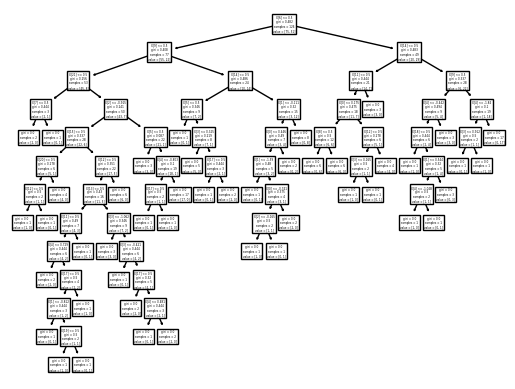

In [54]:
from sklearn import tree
tree.plot_tree(dt_classifier)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [56]:
rfc_param_grid={
    'n_estimators':range(1,1000,10),
              }
rfc = RandomForestClassifier()

rfc_random=RandomizedSearchCV(param_distributions=rfc_param_grid,estimator=rfc,scoring='accuracy',verbose=0,n_iter=100,cv=4,
                             random_state=42)
rfc_random.fit(X_train, y_train)
best_params=rfc_random.best_params_
print(f'Best parameters:{best_params}')

Best parameters:{'n_estimators': 251}


In [57]:
rfc=RandomForestClassifier(n_estimators= 391)
rfc.fit(X_train, y_train)
print(rfc.score(X_test,y_test))

0.7441860465116279


In [58]:
y_pred5=rfc.predict(X_test)
accuracy_score(y_pred5,y_test)

0.7441860465116279

In [59]:
print(classification_report(y_pred5,y_test))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.61      0.88      0.72        16

    accuracy                           0.74        43
   macro avg       0.75      0.77      0.74        43
weighted avg       0.79      0.74      0.75        43



In [60]:
y_hat5=rfc.predict(X_test)
f1_score(y_test,y_hat5)

0.717948717948718

In [61]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X,y,cv=3, scoring = 'f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.7826087  0.69767442 0.62962963]
Cross validation Score: 0.7033042479621515
Std : 0.06258018799496866


In [62]:
## XGBoost Classifier

In [63]:
from xgboost import XGBClassifier#importing the model library
xgbc=XGBClassifier() ## object creation
xgbc.fit(X_train, y_train)# fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
y_pred6=xgbc.predict(X_test)
accuracy_score(y_pred6,y_test)

0.7674418604651163

In [65]:
print(classification_report(y_pred6,y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.74      0.81      0.77        21

    accuracy                           0.77        43
   macro avg       0.77      0.77      0.77        43
weighted avg       0.77      0.77      0.77        43



In [66]:
y_hat6=xgbc.predict(X_test)
f1_score(y_test,y_hat6)

0.7727272727272727

In [67]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbc,X,y,cv=3, scoring = 'f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.73913043 0.71111111 0.64150943]
Cross validation Score: 0.6972503266186614
Std : 0.04104108478383614


## Hyperparameter Tuning

In [68]:
## DecisionTreeClassifier

In [69]:
params={'max_depth':range(1,1000,10),'criterion':['gini','entropy']}  
dtc=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=params,verbose=2,random_state=42)
dtc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................criterion=gini, max_depth=951; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=951; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=951; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=951; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=951; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.0s
[CV] END ......................criterion=gini, max_depth=301; total time=   0.0s
[CV] END ......................criterion=gini, m

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 1000, 10)},
                   random_state=42, verbose=2)

In [70]:
dtc.best_params_

{'max_depth': 451, 'criterion': 'gini'}

In [71]:
dtc.best_score_

0.7224615384615385

In [72]:
dtc_classifier=DecisionTreeClassifier(criterion='entropy',max_depth =741,random_state=42)
dtc_classifier.fit(X_train, y_train)
print(dtc_classifier.score(X_test,y_test))

0.6976744186046512


In [73]:
## XGBClassifier

In [74]:
params={'max_depth':range(1,1000,10),'criterion':['gini','entropy']}  
xgbc=RandomizedSearchCV(XGBClassifier(),param_distributions=params,verbose=2,random_state=42)
xgbc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[13:00:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV] END ......................criterion=gini, max_depth=951; total time=   0.0s
[13:00:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV] END ......................criterion=gini, max_depth=951; total time=   0.0s
[13:00:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV] END ......................criterion=gini, max_depth=951; total time=   0.0s
[13:01:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91c

[CV] END ......................criterion=gini, max_depth=691; total time=   0.0s
[13:01:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV] END ......................criterion=gini, max_depth=691; total time=   0.0s
[13:01:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV] END ......................criterion=gini, max_depth=691; total time=   0.0s
[13:01:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV] END ......................criterion=gini, max_depth=691; total time=   0.0s
[13:01:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_c

In [75]:
xgbc.best_params_

{'max_depth': 951, 'criterion': 'gini'}

In [76]:
xgbc.best_score_

0.8095384615384615

In [77]:
xgbc_classifier=DecisionTreeClassifier(criterion='gini',max_depth =951,random_state=42)
xgbc_classifier.fit(X_train, y_train)
print(xgbc_classifier.score(X_test,y_test))

0.6976744186046512


In [78]:
## RandomForestClassifier

In [79]:
params={'max_depth':range(1,1000,10),'criterion':['gini','entropy']}  
rfc=RandomizedSearchCV(RandomForestClassifier(),param_distributions=params,verbose=2,random_state=42)
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................criterion=gini, max_depth=951; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=951; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=951; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=951; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=951; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=151; total time=   0.1s
[CV] END ......................criterion=gini, max_depth=301; total time=   0.1s
[CV] END ......................criterion=gini, m

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 1000, 10)},
                   random_state=42, verbose=2)

In [80]:
rfc.best_params_

{'max_depth': 691, 'criterion': 'gini'}

In [81]:
rfc.best_score_

0.7855384615384615

In [82]:
rfc_classifier=DecisionTreeClassifier(criterion='entropy',max_depth =151,random_state=42)
rfc_classifier.fit(X_train, y_train)
print(rfc_classifier.score(X_test,y_test))

0.6976744186046512


In [83]:
### SVC

In [84]:
params={'C':range(1,1000,10),'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear','poly','rbf','sigmoid']}  
svc=RandomizedSearchCV(SVC(),param_distributions=params,verbose=2,random_state=42)
svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=561, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ................C=721, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=431, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=431, gamma=1, k

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': range(1, 1000, 10),
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [85]:
svc.best_params_

{'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 721}

In [86]:
svc.best_score_

0.8104615384615383

In [87]:
# print how our model looks after hyper-parameter tuning
print(svc.best_estimator_)

SVC(C=721, gamma=0.0001, kernel='sigmoid')


In [88]:
svc_predictions = svc.predict(X_test)
  
# print classification report
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.88      0.65      0.75        23

    accuracy                           0.77        43
   macro avg       0.79      0.78      0.77        43
weighted avg       0.79      0.77      0.77        43



In [89]:
svc_classifier=SVC(kernel='sigmoid',gamma= 0.0001,C=721)
svc_classifier.fit(X_train,y_train)
print(svc_classifier.score(X_test,y_test))

0.7674418604651163


In [90]:
## KNeighborsClassifier

In [91]:
params={'n_neighbors' : range(1,40),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan']}  
knn=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=params, verbose=2, cv=3, n_jobs = -1, random_state=42)
knn.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': range(1, 40),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [92]:
knn.best_params_

{'weights': 'uniform', 'n_neighbors': 26, 'metric': 'manhattan'}

In [93]:
# print how our model looks after hyper-parameter tuning
print(knn.best_estimator_)

KNeighborsClassifier(metric='manhattan', n_neighbors=26)


In [94]:
knn_predictions = knn.predict(X_test)
  
# print classification report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.84      0.70      0.76        23

    accuracy                           0.77        43
   macro avg       0.78      0.77      0.77        43
weighted avg       0.78      0.77      0.77        43



In [95]:
knn_classifier=KNeighborsClassifier(weights='uniform',n_neighbors= 5 ,metric='minkowski')
knn_classifier.fit(X_train,y_train)
print(knn_classifier.score(X_test,y_test))

0.7441860465116279


## Artificial Neural Networks

We know how ANNs could give a comparable performance with only a few layers of linear units. Using the Sequential model class of Keras, we can build a simple ANN with four hidden layers as follows:

In [96]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout
model=tf.keras.Sequential([
    layers.Dense(20,activation='relu',name='dense1'),
    Dropout(0.2),
    layers.Dense(25,activation='relu',name='dense2'),
    layers.Dense(45,activation='relu',name='dense3'),
    Dropout(0.5),
    layers.Dense(10,activation='relu',name='dense4'),
    layers.Dense(2,activation='sigmoid',name='fc1'),
])

In [97]:
model.compile(
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy']
)

In [98]:
model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=2)
model.evaluate(X_test,y_test,batch_size=32,verbose=2)

Epoch 1/100
4/4 - 2s - loss: 0.7314 - accuracy: 0.4841 - 2s/epoch - 462ms/step
Epoch 2/100
4/4 - 0s - loss: 0.7102 - accuracy: 0.4921 - 18ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6730 - accuracy: 0.5794 - 51ms/epoch - 13ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6716 - accuracy: 0.6825 - 25ms/epoch - 6ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6638 - accuracy: 0.6111 - 27ms/epoch - 7ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6561 - accuracy: 0.6667 - 28ms/epoch - 7ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6287 - accuracy: 0.6667 - 23ms/epoch - 6ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6210 - accuracy: 0.6905 - 20ms/epoch - 5ms/step
Epoch 9/100
4/4 - 0s - loss: 0.6218 - accuracy: 0.6984 - 21ms/epoch - 5ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6123 - accuracy: 0.6667 - 21ms/epoch - 5ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6017 - accuracy: 0.7222 - 26ms/epoch - 6ms/step
Epoch 12/100
4/4 - 0s - loss: 0.5658 - accuracy: 0.7778 - 49ms/epoch - 12ms/step
Epoch 13/100
4/4 - 0s - loss: 0.5694 - accuracy

[0.8095417618751526, 0.7441860437393188]

Moreover, SparseCategoricalCrossentropy loss is often the best choice for binary classification problems like ours. Training the ANN for 100 epochs with a batch size of 32, we have a training accuracy of 91.2% and a test accuracy of 81.4%

After trying five different machine learning techniques to predict heart disease, it is clear that K-nearest neighbors perform the best on our dataset. However, feature engineering and hyperparameter tuning in other models can also yield comparable results. Moreover, we can extend the dataset, using more samples and more key features by trying out these models again. Data-availability remains a major problem for modernizing health care systems using artificial intelligence, especially clean, structured datasets for supervised learning.

Nevertheless, after experimentation in Python, we can say that machine learning can significantly help detect the presence and future risk of heart attacks, strokes, coronary artery disease, and other heart diseases.